Dataset Head:
        Date  Caseload    Region  Vaccination_Rate  Healthcare_Facilities
0 2023-01-01       105  Region_A                50                      5
1 2023-01-02       102  Region_B                51                      6
2 2023-01-03       104  Region_A                52                      7
3 2023-01-04       106  Region_B                53                      5
4 2023-01-05       108  Region_A                54                      6

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   100 non-null    datetime64[ns]
 1   Caseload               100 non-null    int64         
 2   Region                 100 non-null    object        
 3   Vaccination_Rate       100 non-null    int64         
 4   Healthcare_Facilities  100 non-null    int64         
dtypes: dat

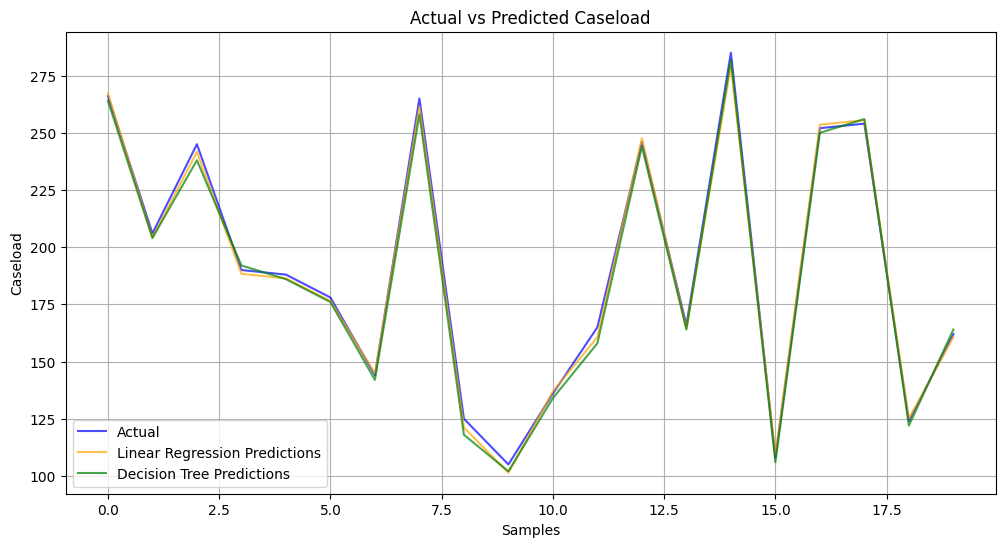


Forecasting Future Caseload with Decision Tree...


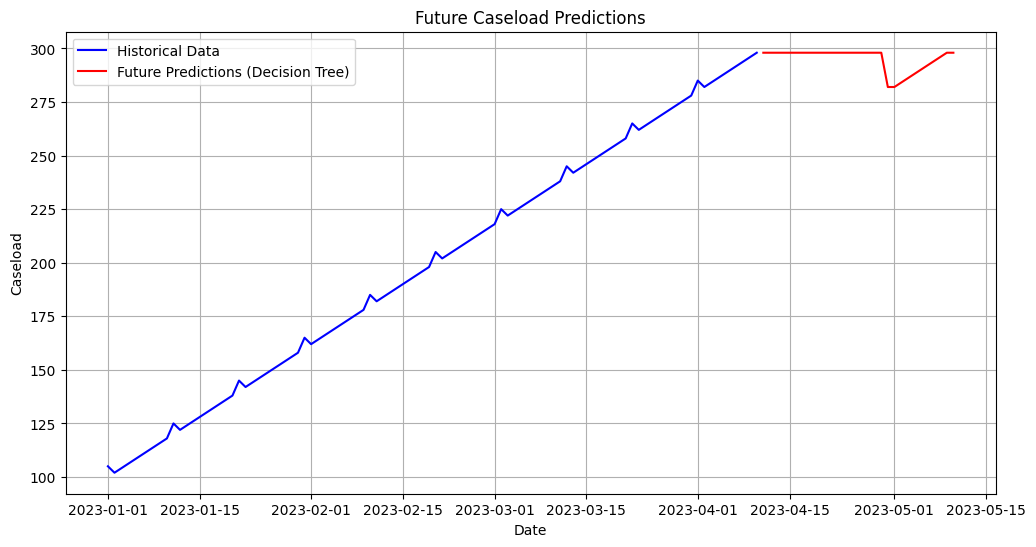

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
data_path = r"C:\\Users\\Shreya\\Documents\\Project\\DataSet\\sample_predictive_analysis_dataset.xlsx"
data = pd.read_excel(data_path)

# Inspect the data
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date
data = data.sort_values('Date')

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values
data['Caseload'] = data['Caseload'].ffill()

# Create features for predictive analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
features = ['Year', 'Month', 'Day']

# Target variable
target = 'Caseload'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
print("\nTraining Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression Model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared (R2): {lr_r2}")

# Decision Tree Model
print("\nTraining Decision Tree Model...")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree Model
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("\nDecision Tree Model Evaluation:")
print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse}")
print(f"R-squared (R2): {dt_r2}")

# Visualize actual vs predicted for both models
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(lr_predictions, label='Linear Regression Predictions', color='orange', alpha=0.7)
plt.plot(dt_predictions, label='Decision Tree Predictions', color='green', alpha=0.7)
plt.title('Actual vs Predicted Caseload')
plt.xlabel('Samples')
plt.ylabel('Caseload')
plt.legend()
plt.grid()
plt.show()

# Predict future caseload using the Decision Tree model
print("\nForecasting Future Caseload with Decision Tree...")
future_steps = 30
last_row = data.iloc[-1][features]
future_dates = [data['Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]
future_features = pd.DataFrame({
    'Year': [last_row['Year']] * future_steps,
    'Month': [last_row['Month']] * future_steps,
    'Day': [(last_row['Day'] + i) % 30 + 1 for i in range(1, future_steps + 1)]
})
future_forecast = dt_model.predict(future_features)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Caseload': future_forecast})

# Visualize future forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Caseload'], label='Historical Data', color='blue')
plt.plot(future_df['Date'], future_df['Predicted_Caseload'], label='Future Predictions (Decision Tree)', color='red')
plt.title('Future Caseload Predictions')
plt.xlabel('Date')
plt.ylabel('Caseload')
plt.legend()
plt.grid()
plt.show()


Dataset Head:
        Date  Caseload    Region  Vaccination_Rate  Healthcare_Facilities
0 2023-01-01       105  Region_A                50                      5
1 2023-01-02       102  Region_B                51                      6
2 2023-01-03       104  Region_A                52                      7
3 2023-01-04       106  Region_B                53                      5
4 2023-01-05       108  Region_A                54                      6

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   100 non-null    datetime64[ns]
 1   Caseload               100 non-null    int64         
 2   Region                 100 non-null    object        
 3   Vaccination_Rate       100 non-null    int64         
 4   Healthcare_Facilities  100 non-null    int64         
dtypes: dat

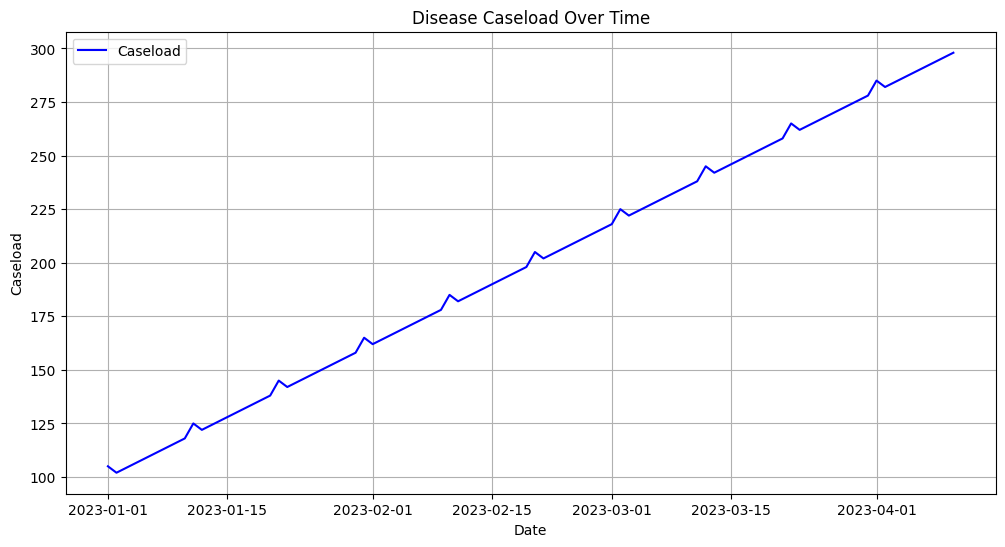


Training ARIMA Model...
                               SARIMAX Results                                
Dep. Variable:               Caseload   No. Observations:                   80
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -171.876
Date:                Wed, 22 Jan 2025   AIC                            355.751
Time:                        16:20:40   BIC                            369.968
Sample:                             0   HQIC                           361.447
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3350      0.129     -2.588      0.010      -0.589      -0.081
ar.L2          0.1159      0.184      0.632      0.528      -0.244       0.476
ar.L3          0.3642      

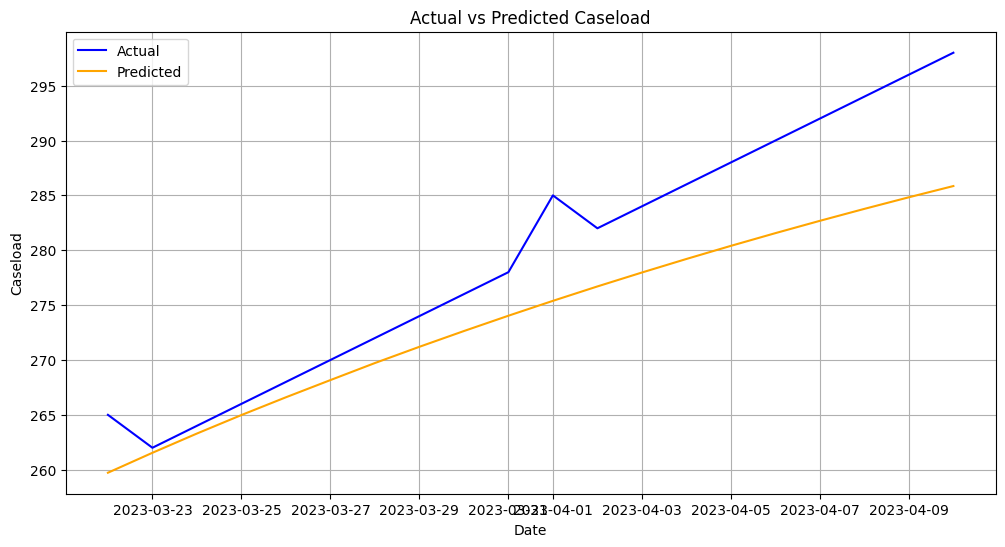


Forecasting Future Caseloads...


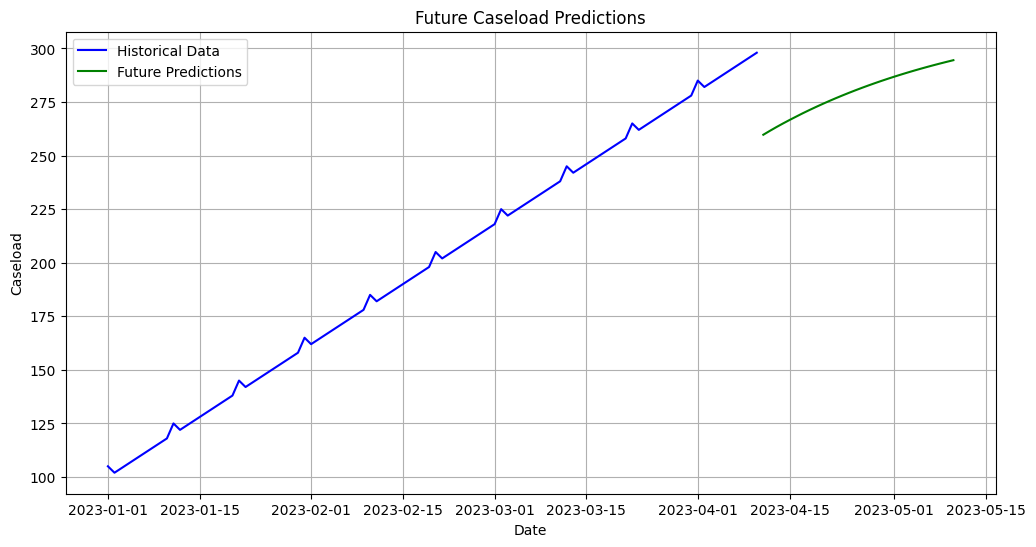

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = r"C:\\Users\\Shreya\\Documents\\Project\\DataSet\\sample_predictive_analysis_dataset.xlsx"
data = pd.read_excel(data_path)

# Inspect the data
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date
data = data.sort_values('Date')

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values if any
data['Caseload'] = data['Caseload'].ffill()

# Visualize the caseload over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Caseload'], label='Caseload', color='blue')
plt.title('Disease Caseload Over Time')
plt.xlabel('Date')
plt.ylabel('Caseload')
plt.legend()
plt.grid()
plt.show()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# ARIMA model for predictive analysis
print("\nTraining ARIMA Model...")
model = ARIMA(train_data['Caseload'], order=(5, 1, 0))  # (p, d, q) parameters can be tuned
arima_model = model.fit()

# Print model summary
print(arima_model.summary())

# Predict on the test data
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = arima_model.predict(start=start, end=end, dynamic=False)

# Evaluate the model
mae = mean_absolute_error(test_data['Caseload'], predictions)
mse = mean_squared_error(test_data['Caseload'], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['Caseload'], predictions)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs predicted caseload
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Caseload'], label='Actual', color='blue')
plt.plot(test_data['Date'], predictions, label='Predicted', color='orange')
plt.title('Actual vs Predicted Caseload')
plt.xlabel('Date')
plt.ylabel('Caseload')
plt.legend()
plt.grid()
plt.show()

# Forecast future caseloads
print("\nForecasting Future Caseloads...")
future_steps = 30  # Number of days to predict
future_forecast = arima_model.forecast(steps=future_steps)

# Create a DataFrame for future predictions
last_date = data['Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Caseload': future_forecast})

# Visualize future forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Caseload'], label='Historical Data', color='blue')
plt.plot(future_df['Date'], future_df['Predicted_Caseload'], label='Future Predictions', color='green')
plt.title('Future Caseload Predictions')
plt.xlabel('Date')
plt.ylabel('Caseload')
plt.legend()
plt.grid()
plt.show()
